# Projeto 01 - Importação e limpeza de dados no Python 

### Objetivos desse projeto:

Nesse projeto irei demonstrar como são realizadas 2 etapas essenciais de qualquer trabalho de Data Science, que são:

- (1) Importação e conhecimento prévio sobre um conjunto de dados;
- (2) Limpeza dos dados / Pré-processamento.

###Detalhamento do Dataset estudado

-  Para atingir esses objetivos irei trabalhar com um Dataset oriundo do site a seguir: https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho

-  Esse dataset possui dados de carros alugados o qual permite fazer diversas análises em Data Science, inclusive criar modelos preditivos de machine learning, através de regressão linear.



### Perguntas centrais do Dataset:



Nesse dataset podemos explorar as seguintes perguntas centrais:

- O valor de preço de venda final desses carros usados está relacionada aos seus atributos?

- Se sim, quais os atributos que irão influenciar nesse valor de preço?



##### - Para respondê-las primeiro tenho de realizar a "(1) Importação e conhecimento prévio sobre um conjunto de dados" e "(2) Limpeza dos dados / Pré-processamento".

##### - Só após concluídas essas etapas que posso dar prosseguimento a etapas subsequentes de Data Science, como "Análises Exploratórias do dataset" e "Criação de  Modelos de Machine Learning".

##### - Essas outras etapas serão realizadas em um próximo projeto.

# Bibliotecas utilizadas nesse projeto:

- pandas

- numpy

- missingno

- matplotlib

# (1) Importação e conhecimento prévio sobre um conjunto de dados

In [377]:
#Vou trabalhar com a biblioteca pandas para importar e explorar inicialmente o Dataset

#Importando a biblioteca pandas

import pandas as pd

In [378]:
#Importando a biblioteca Numpy

import numpy as np

In [379]:
#Agora vou importar o meu conjunto de dados através dessa biblioteca

carros = pd.read_csv("Car details v3.csv")

Aqui irei começar a entender como está configurado o meu conjunto de dados.

In [380]:
#Vou identificar quantas linhas e colunas existem nesse conjunto de dados

carros.shape

(8128, 13)

In [381]:
#Quero visualizar as 5 primeiras linhas para identificar quais são as variáveis que existem nesse dataset.

carros.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [382]:
#Vou alterar o nome das colunas para nomes em português

carros.columns = "nome_completo_do_carro", "ano",	"preco_de_venda" , "km_rodado" ,	"tipo_combustivel" ,	"tipo_do_vendedor"	, "transmissao", "dono", "consumo_do_combustivel", "motor", "potencia_do_motor", "torque", "assentos"
carros.head(5)

,nome_completo_do_carro,ano,preco_de_venda,km_rodado,tipo_combustivel,tipo_do_vendedor,transmissao,dono,consumo_do_combustivel,motor,potencia_do_motor,torque,assentos
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


Vou identificar quais são os tipos de dados para cada variável.

In [383]:
carros.dtypes

nome_completo_do_carro     object
ano                         int64
preco_de_venda              int64
km_rodado                   int64
tipo_combustivel           object
tipo_do_vendedor           object
transmissao                object
dono                       object
consumo_do_combustivel     object
motor                      object
potencia_do_motor          object
torque                     object
assentos                  float64
dtype: object

No site https://pbpython.com/pandas_dtypes.html, encontramos uma imagem que ilustra o significado para os diferentes tipos de valores da biblioteca pandas, por meio da função "dtype".

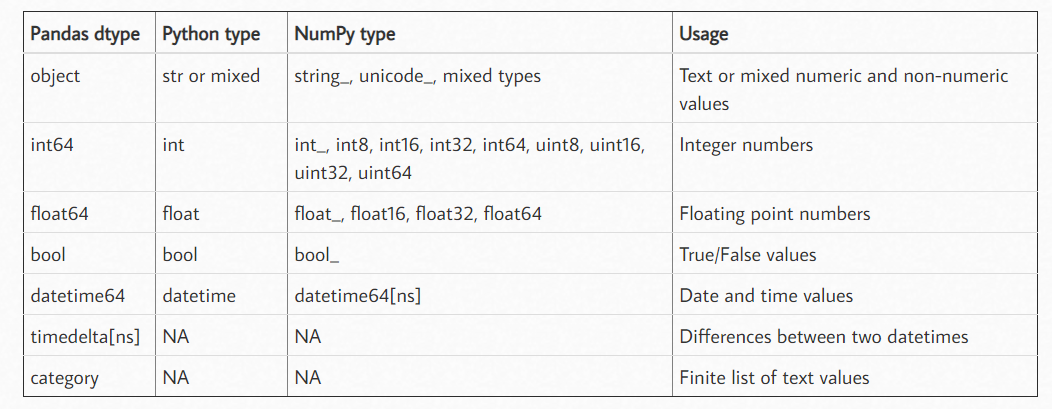







####Por meio dessa referência e da função realizada identifiquei que há os seguintes tipos de valores no dataset:
 

- "object", o qual é dado é dado para texto e valores não numéricos;

- "int64", que se refere a números inteiros;

- "float64", que se refere a valores com decimais.

####Assim, esse dataset possui:

- **4** variáveis numéricas que são: "ano", "preco_de_venda", "km_rodado" e "assentos";

- **9** variáveis categóricas que são: "nome_completo_do_carro", "tipo_combustivel",	"tipo_do_vendedor", "transmissao", "dono", "consumo_do_combustivel", "motor", "potencia_do_motor" e "torque".



## Resumo de estatísticas descritivas para o dataset

- Informações para valores numéricos

In [384]:
carros.describe()

,ano,preco_de_venda,km_rodado,assentos
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


## Resumo de estatísticas descritivas para o dataset

- Incluindo todas as variáveis, inclusive as categóricas

In [385]:
carros.describe(include="all")

,nome_completo_do_carro,ano,preco_de_venda,km_rodado,tipo_combustivel,tipo_do_vendedor,transmissao,dono,consumo_do_combustivel,motor,potencia_do_motor,torque,assentos
count,8128,8128.000000,8.128000e+03,8.128000e+03,8128,8128,8128,8128,7907,7907,7913,7906,7907.000000
unique,2058,NaN,NaN,NaN,4,3,2,5,393,121,322,441,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,129,NaN,NaN,NaN,4402,6766,7078,5289,225,1017,377,530,NaN
mean,NaN,2013.804011,6.382718e+05,6.981951e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.416719
std,NaN,4.044249,8.062534e+05,5.655055e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.959588
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.800000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


# (2) Limpeza dos dados / Pré-processamento.

#### Essa etapa de limpeza dos dados é uma das mais importantes etapas em trabalhos de Data Science.

#### Isso porque é nessa etapa que:

- (1) identificamos e lidamos com a existência de possíveis valores ausentes que possam prejudicar as análises posteriores;

- (2) identificamos se os dados de cada variável estão formatados corretamente. Dados devidamente formatados garantem que as análises preditivas de machine learning ajudem a responder as perguntas centrais de forma eficaz;

- (3) identificamos se os dados estão normalizados ou não. A normalização é uma etapa importante, uma vez que torna valores de variáveis específicas dentro de uma mesma escala de proporções. Isso permite que modelos preditivos possam ser criados de forma eficaz;

- (4) compartimentalizamos dados, ato também conhecido como "Binning". Binning é o ato de compartimentalizar dados de uma variável quantitativa em determinados grupos através de seus valores. Tal conversão ajuda a melhor entender a distribuição desses valores.

- (5) transformamos variáveis categóricas para variáveis numéricas, criando variáveis indicadoras. É com o uso de variáveis indicadoras que conseguimos utilizar variáveis categóricas para análises de regressão.

## Nesse tópico irei realizar todas essas tarefas descritas acima:

#- (1) Identificar e manejar valores ausentes

####Há várias formas para lidar com dados ausentes. E pode ser feita, por exemplo, de 4 formas como descritas a seguir:

- A - Rever os dados originais e checar se na hora de passar para a planilha um determinado valor não foi "perdido";

- B - Substituir o valor ausente por outro valor;

- C - Remover as linhas ou apenas as colunas que contêm esses valores ausentes.

- D - Deixar da forma que está;



Temos de checar inicialmente se há valores ausentes nesses dados

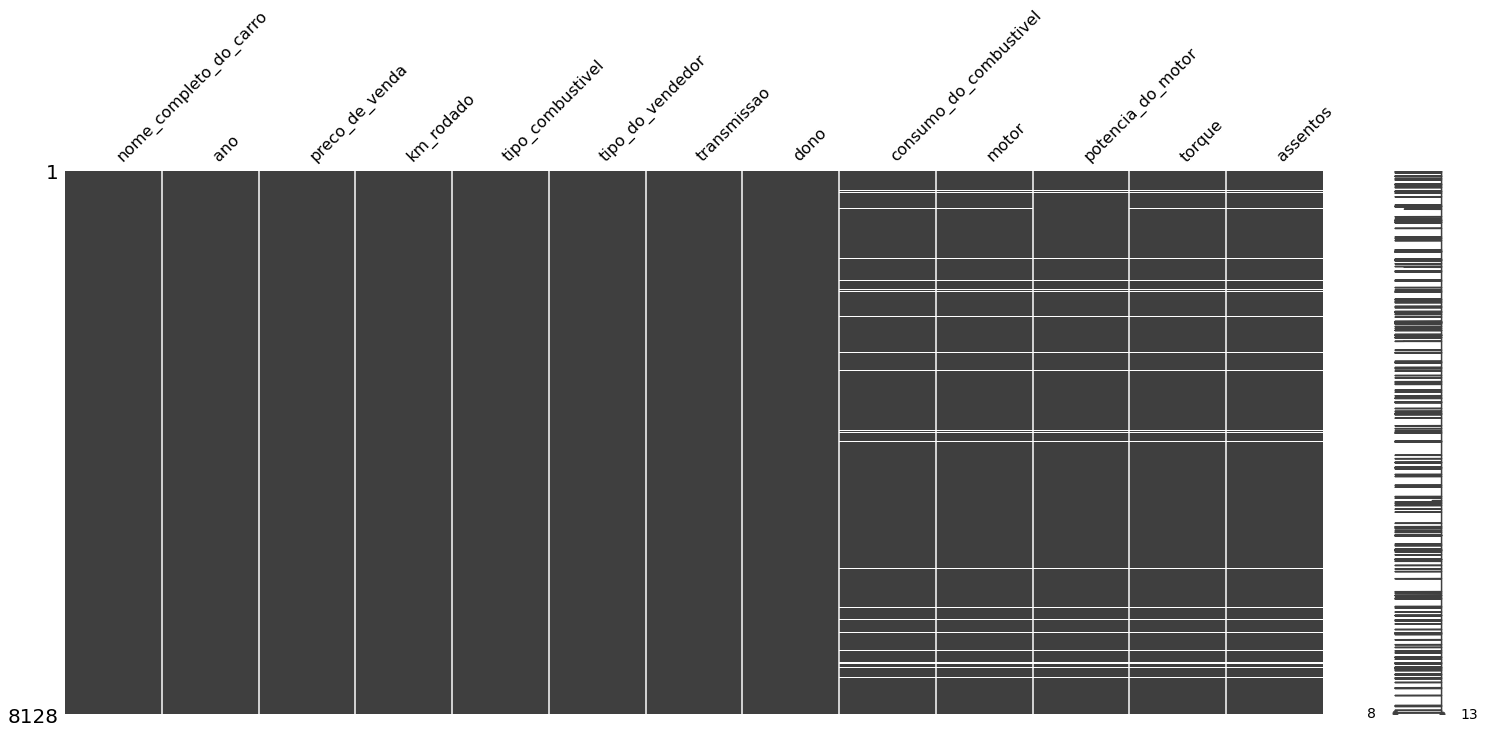

In [386]:
#Identificando graficamente a ausência de valores no dataset

import missingno as msg
msg.matrix(carros)

In [387]:
# Identificando quantos valores ausentes existem para cada variável
carros.isnull().sum()

nome_completo_do_carro      0
ano                         0
preco_de_venda              0
km_rodado                   0
tipo_combustivel            0
tipo_do_vendedor            0
transmissao                 0
dono                        0
consumo_do_combustivel    221
motor                     221
potencia_do_motor         215
torque                    222
assentos                  221
dtype: int64

####Através do resultado da função acima, identifiquei que o conjunto de dados têm 5 variáveis com valores nulos, que são: (1) "consumo_do_combustivel ", (2) "motor", (3) "potencia_do_motor ", (4) "torque" e (5) "assentos".

#### Como esses dados foram coletados por outra pessoa, eu não tenho acesso ao banco original dos dados. Assim, não tenho como checar se algum dado foi "perdido" no momento que foi passado para a planilha atual.

#### Para esse projeto vou demonstrar como posso lidar usando as seguintes formas:



- (A) - Substituir o valor ausente por outro;

- (B) - Remover a linha / ou coluna" em que está esse valor ausente.

Para exemplificar como lidamos com dados ausentes vou utilizar apenas a variável numérica "assentos".

## (A) - Substituir o valor ausente por outro

Para substituir um valor ausente por algum outro podemos, por exemplo, substituir pela média de todos esses valores da variável. É isso que irei fazer.

In [388]:
#Identificando a média da variável "assentos"

mean = carros["assentos"].mean()

mean

5.41671936259011

In [389]:
#Substituindo os valores ausentes dessa variável por sua média

carros["assentos"].fillna(value=mean, inplace=True)

In [390]:
# Identificando quantos valores ausentes existem para cada variável, incluindo a variável "assentos"
carros.isnull().sum()

nome_completo_do_carro      0
ano                         0
preco_de_venda              0
km_rodado                   0
tipo_combustivel            0
tipo_do_vendedor            0
transmissao                 0
dono                        0
consumo_do_combustivel    221
motor                     221
potencia_do_motor         215
torque                    222
assentos                    0
dtype: int64

Por meio das funções acima é possível identificar que não há mais nenhum valor ausente para a variável "assentos".

## (B) - Remover a linha / ou coluna" em que está esse valor ausente



Importando novamente os dados iniciais

In [391]:
carros = pd.read_csv("Car details v3.csv")

#Vou alterar o nome das colunas para nomes em português

carros.columns = "nome_completo_do_carro", "ano",	"preco_de_venda" , "km_rodado" ,	"tipo_combustivel" ,	"tipo_do_vendedor"	, "transmissao", "dono", "consumo_do_combustivel", "motor", "potencia_do_motor", "torque", "assentos"
carros.head(5)

,nome_completo_do_carro,ano,preco_de_venda,km_rodado,tipo_combustivel,tipo_do_vendedor,transmissao,dono,consumo_do_combustivel,motor,potencia_do_motor,torque,assentos
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [392]:
#Removendo apenas as linhas com valores ausentes da variável "assentos"

carros.dropna(subset=["assentos"], axis=0, inplace = True)

carros = carros.dropna(subset=["assentos"], axis=0,)

In [393]:
#Checando novamente para ver se há valores ausentes nessa variável:

carros.isnull().sum()

nome_completo_do_carro    0
ano                       0
preco_de_venda            0
km_rodado                 0
tipo_combustivel          0
tipo_do_vendedor          0
transmissao               0
dono                      0
consumo_do_combustivel    0
motor                     0
potencia_do_motor         0
torque                    1
assentos                  0
dtype: int64

- Ainda há uma variável com valor ausente. Assim, irei remover também essa linha da variável "torque".

In [394]:
#Removendo apenas as linhas com valores ausentes

carros.dropna(subset=["torque"], axis=0, inplace = True)

carros = carros.dropna(subset=["torque"], axis=0,)

In [395]:
#Checando novamente para ver se há valores ausentes nessa variável:

carros.isnull().sum()

nome_completo_do_carro    0
ano                       0
preco_de_venda            0
km_rodado                 0
tipo_combustivel          0
tipo_do_vendedor          0
transmissao               0
dono                      0
consumo_do_combustivel    0
motor                     0
potencia_do_motor         0
torque                    0
assentos                  0
dtype: int64

Não há mais nhuma variável com valor ausente. Assim, podemos prosseguir.

##Observação:

####- Para as próximas etapas irei *manter essa configuração atual*, no qual as linhas com valores ausentes foram removidas.

# - (2) Formatação dos dados

In [396]:
#Revendo novamente os dados

carros.head(5)

,nome_completo_do_carro,ano,preco_de_venda,km_rodado,tipo_combustivel,tipo_do_vendedor,transmissao,dono,consumo_do_combustivel,motor,potencia_do_motor,torque,assentos
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


#Observação:

- Irei checar todas as 13 variáveis e irei formatá-las, uma a uma caso caso eu identifique a necessidade;

- Essa formatação permitirá que as perguntas centrais mencionadas no começo do projeto sejam atingidas de forma eficaz;

- As perguntas centrais serão alvo de estudo dos próximos projetos, mas irão necessitar dos passos a seguir.

- Após formatadas eu irei salvar um novo dataframe. Isso fará com que eu tenha acesso fácil a esse novo dataset já com as devidas formatações.

## Variável 1- "nome_completo_do_carro"

Como é uma variável categórica, a melhor forma de checar se os dados estão corretamente formatados será através dos valores únicos:


In [397]:
#Identificando os valores únicos dessa variável

carros.nome_completo_do_carro.unique()


array(['Maruti Swift Dzire VDI', 'Skoda Rapid 1.5 TDI Ambition',
       'Honda City 2017-2020 EXi', ..., 'Tata Nexon 1.5 Revotorq XT',
       'Ford Freestyle Titanium Plus Diesel BSIV',
       'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV'], dtype=object)

In [398]:
carros.nome_completo_do_carro.drop_duplicates()

0                             Maruti Swift Dzire VDI
1                       Skoda Rapid 1.5 TDI Ambition
2                           Honda City 2017-2020 EXi
3                          Hyundai i20 Sportz Diesel
4                             Maruti Swift VXI BSIII
                            ...                     
8087                           Tata Bolt Revotron XM
8094              Tata Manza Aura (ABS) Safire BS IV
8100                      Tata Nexon 1.5 Revotorq XT
8109        Ford Freestyle Titanium Plus Diesel BSIV
8113    Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV
Name: nome_completo_do_carro, Length: 1982, dtype: object

Essa variável "nome_completo_do_carro" está devidamente formatada.

# 2 - Variável "ano"

In [399]:
#valores únicos:

carros.ano.unique()

array([2014, 2006, 2010, 2007, 2017, 2001, 2011, 2013, 2005, 2009, 2016,
       2012, 2002, 2015, 2018, 2019, 2008, 2020, 1999, 2000, 2003, 2004,
       1994, 1998, 1997, 1995, 1996])

Variável "ano" está formatada corretamente.

# 3- Variável "preco_de_venda"

In [400]:
#Revendo novamente os dados

carros.head(5)

,nome_completo_do_carro,ano,preco_de_venda,km_rodado,tipo_combustivel,tipo_do_vendedor,transmissao,dono,consumo_do_combustivel,motor,potencia_do_motor,torque,assentos
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


### **Observação**:

- A variável preço de venda ("preco_de_venda") é uma das mais importantes variáveis desse dataset. Isso porque é com ela que irei checar se essa variável é influenciada por outras caracteristicas desse dataset.

- Ao buscar informações sobre esse dataset, no site de referência, observei que o criador desse dataset colocou o valor de "preco_de_venda" em unidades de Rupia indiana (INR), que é a moeda corrente oficial da Índia.

- No entanto, pretendo analisar sob o ponto de vista da moeda "dólar". Assim, terei de formatar os valores para dólares.

- Um dólar, cuja unidade é USD, equivale a aproximadamente 72,38 INR na data que escrevi esse projeto (28/05/2021). Aqui irei adotar que a proporção é de 73 INR para 1 USD.

- Dessa forma, irei dividir todos os valores da coluna "preco_de_venda" por 73 conforme função abaixo:

In [401]:
#Dividindo a coluna por 73

carros["preco_de_venda"]= carros["preco_de_venda"].div(73)

#Renomeando essa coluna agora para preco_de_venda_USD

carros.rename(columns={"preco_de_venda": "preco_de_venda_USD"}, inplace=True)

carros.head(5)

,nome_completo_do_carro,ano,preco_de_venda_USD,km_rodado,tipo_combustivel,tipo_do_vendedor,transmissao,dono,consumo_do_combustivel,motor,potencia_do_motor,torque,assentos
0,Maruti Swift Dzire VDI,2014,6164.383562,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,5068.493151,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,2164.383562,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,3082.191781,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,1780.821918,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


- Valores totais para essa variável "preco_venda_USD"

In [402]:
carros.preco_de_venda_USD

0       6164.383562
1       5068.493151
2       2164.383562
3       3082.191781
4       1780.821918
           ...     
8123    4383.561644
8124    1849.315068
8125    5232.876712
8126    3972.602740
8127    3972.602740
Name: preco_de_venda_USD, Length: 7906, dtype: float64

- Por meio da função acima identifiquei que essa variável agora está formatada corretamente.

# Variável 4 - "km_rodado"

In [403]:
#valores únicos:

carros.km_rodado.unique()

array([ 145500,  120000,  140000,  127000,   45000,  175000,    5000,
         90000,  169000,   68000,  100000,   40000,   70000,   53000,
         80000,   50000,   72000,   35000,   28000,   25000,    2388,
         16200,   10000,   15000,   42000,   60000,   76000,   28900,
         86300,   23300,   32600,   10300,   77000,   99000,   27800,
         49800,  151000,   54700,   64000,   63000,  127700,   33900,
         59000,  110000,  147000,   30000,  135000,    9850,   78000,
        170000,   49000,   32000,   38000,   44000,   12000,   55500,
         61500,  150000,   37800,  114000,   48000,   69000,   13000,
         76139,   65000,    1303,   31800,   20000,   17000,   21000,
         37000,   29500,    7500,   19000,   41000,   39000,   22000,
         47000,   72200,   49900,    9000,   11000,   95000,   18000,
         46100,   16000,    9654,   24300,   42163,    8000,   71000,
          9500,   36600,   14000,  120600,   86000,    7800,   31377,
         75000,   93

- Essa variável "km_rodado" está formatado corretamente.

# Variável 5 -  "tipo_combustivel"

In [404]:
#valores únicos:

carros.tipo_combustivel.unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

- Essa variável "tipo_combustivel" está formatado corretamente.

# Variável 6 - "tipo_do_vendedor"

In [405]:
#valores únicos:

carros.tipo_do_vendedor.unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

- Essa variável "tipo_do_vendedor" está formatado corretamente.

# Variável 7 - "transmissao"

In [406]:
#valores únicos:

carros.transmissao.unique()

array(['Manual', 'Automatic'], dtype=object)

Essa variável "transmissao" está formatado corretamente.

# Variável 8 - "dono"

In [407]:
#valores únicos:

carros.dono.unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

Essa variável "dono" está formatado corretamente.

# Variável 9 - "consumo_do_combustivel"

In [408]:
#valores únicos:

carros.consumo_do_combustivel.unique()

array(['23.4 kmpl', '21.14 kmpl', '17.7 kmpl', '23.0 kmpl', '16.1 kmpl',
       '20.14 kmpl', '17.3 km/kg', '23.59 kmpl', '20.0 kmpl',
       '19.01 kmpl', '17.3 kmpl', '19.3 kmpl', '18.9 kmpl', '18.15 kmpl',
       '24.52 kmpl', '19.7 kmpl', '22.54 kmpl', '21.0 kmpl', '25.5 kmpl',
       '26.59 kmpl', '21.5 kmpl', '20.3 kmpl', '21.4 kmpl', '24.7 kmpl',
       '18.2 kmpl', '16.8 kmpl', '24.3 kmpl', '14.0 kmpl', '18.6 kmpl',
       '33.44 km/kg', '23.95 kmpl', '17.0 kmpl', '20.63 kmpl',
       '13.93 kmpl', '16.0 kmpl', '17.8 kmpl', '18.5 kmpl', '12.55 kmpl',
       '12.99 kmpl', '14.8 kmpl', '13.5 kmpl', '26.0 kmpl', '20.65 kmpl',
       '27.3 kmpl', '11.36 kmpl', '17.68 kmpl', '14.28 kmpl',
       '18.53 kmpl', '14.84 kmpl', '21.12 kmpl', '20.36 kmpl',
       '21.27 kmpl', '18.16 kmpl', '22.0 kmpl', '25.1 kmpl', '20.51 kmpl',
       '21.66 kmpl', '25.2 kmpl', '22.9 kmpl', '16.02 kmpl', '20.54 kmpl',
       '22.77 kmpl', '15.71 kmpl', '23.1 kmpl', '19.02 kmpl',
       '19.81 kmpl', '26

#Observação:

####Essa variável tem um grande problema a ser resolvido. Isso porque as unidades de alguns valores numéricos variam. Ao notar o resultado da função acima identifiquei que existem as seguintes unidades para "consumo_do_combustivel":

-      1 - kmpl

-      2 - km/kg

####Pela literatura* notei que não há como apenas converter uma variável pela outra, já que é necessária saber a pressão exata em que o gás é pressurizado no veículo, para assim, poder realizar a conversão.



#####*Fonte da referencia: 

https://datascience.stackexchange.com/questions/55663/one-feature-several-units

https://math.stackexchange.com/questions/1141752/how-to-convert-kilometers-kilogram-km-kg-to-miles-gallon-mpg

####Como não disponho dessas informações, para esse projeto em particular irei apenas **trabalhar com os valores que estão em "kmpl"**, ou seja, kilometros rodados por litro.

In [409]:
# Vou remover as unidades de uma lista de valores

# Usando replace() + strip() + list comprehension

import re

In [410]:
# criando uma nova lista

test_list = carros.consumo_do_combustivel

In [411]:
# Imprimindo a lista original
print("A lista original é : " + str(test_list))

A lista original é : 0        23.4 kmpl
1       21.14 kmpl
2        17.7 kmpl
3        23.0 kmpl
4        16.1 kmpl
           ...    
8123     18.5 kmpl
8124     16.8 kmpl
8125     19.3 kmpl
8126    23.57 kmpl
8127    23.57 kmpl
Name: consumo_do_combustivel, Length: 7906, dtype: object


In [412]:
# Inicializando a unidade
unit = "kmpl"

In [413]:
# Removendo unidades de uma lista de valores
# Usando replace() + strip() + list comprehension
carros.consumo_do_combustivel = [sub.replace(unit, "").strip() for sub in test_list]

In [414]:
# Imprimindo o resultado 
print("Lista após a remoção das unidades : " + str(carros.consumo_do_combustivel))

Lista após a remoção das unidades : 0        23.4
1       21.14
2        17.7
3        23.0
4        16.1
        ...  
8123     18.5
8124     16.8
8125     19.3
8126    23.57
8127    23.57
Name: consumo_do_combustivel, Length: 7906, dtype: object


In [415]:
#Checando no dataset a variável "consumo_do_combustivel"

carros.head(5)

,nome_completo_do_carro,ano,preco_de_venda_USD,km_rodado,tipo_combustivel,tipo_do_vendedor,transmissao,dono,consumo_do_combustivel,motor,potencia_do_motor,torque,assentos
0,Maruti Swift Dzire VDI,2014,6164.383562,145500,Diesel,Individual,Manual,First Owner,23.4,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,5068.493151,120000,Diesel,Individual,Manual,Second Owner,21.14,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,2164.383562,140000,Petrol,Individual,Manual,Third Owner,17.7,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,3082.191781,127000,Diesel,Individual,Manual,First Owner,23.0,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,1780.821918,120000,Petrol,Individual,Manual,First Owner,16.1,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


Vou ficar apenas com os valores em "kmpl"

In [416]:
#Removendo os valores que não são numéricos da variável "consumo_do_combustivel"

carros = carros[pd.to_numeric(carros['consumo_do_combustivel'], errors='coerce').notnull()]

carros.head()

,nome_completo_do_carro,ano,preco_de_venda_USD,km_rodado,tipo_combustivel,tipo_do_vendedor,transmissao,dono,consumo_do_combustivel,motor,potencia_do_motor,torque,assentos
0,Maruti Swift Dzire VDI,2014,6164.383562,145500,Diesel,Individual,Manual,First Owner,23.4,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,5068.493151,120000,Diesel,Individual,Manual,Second Owner,21.14,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,2164.383562,140000,Petrol,Individual,Manual,Third Owner,17.7,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,3082.191781,127000,Diesel,Individual,Manual,First Owner,23.0,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,1780.821918,120000,Petrol,Individual,Manual,First Owner,16.1,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [417]:
#Checando se os valores estão todos sem unidades

carros.consumo_do_combustivel.unique()

array(['23.4', '21.14', '17.7', '23.0', '16.1', '20.14', '23.59', '20.0',
       '19.01', '17.3', '19.3', '18.9', '18.15', '24.52', '19.7', '22.54',
       '21.0', '25.5', '26.59', '21.5', '20.3', '21.4', '24.7', '18.2',
       '16.8', '24.3', '14.0', '18.6', '23.95', '17.0', '20.63', '13.93',
       '16.0', '17.8', '18.5', '12.55', '12.99', '14.8', '13.5', '26.0',
       '20.65', '27.3', '11.36', '17.68', '14.28', '18.53', '14.84',
       '21.12', '20.36', '21.27', '18.16', '22.0', '25.1', '20.51',
       '21.66', '25.2', '22.9', '16.02', '20.54', '22.77', '15.71',
       '23.1', '19.02', '19.81', '16.47', '15.04', '19.1', '21.79',
       '18.8', '21.21', '15.37', '11.79', '19.0', '14.3', '15.8', '15.1',
       '19.09', '22.32', '21.9', '14.53', '21.63', '20.85', '20.45',
       '19.67', '23.01', '20.77', '17.92', '17.01', '22.37', '19.33',
       '9.5', '12.83', '22.48', '16.78', '14.67', '15.0', '13.96', '18.0',
       '12.07', '26.21', '10.8', '16.3', '13.6', '14.74', '15.6', '19.5

Observei pela função acima que apesar de não ter mais nenhuma unidade nessa variável, ela ainda está como "object". Preciso alterar para tipo numérico.

In [418]:
#Mudando o tipo da variável

carros["consumo_do_combustivel"]=carros["consumo_do_combustivel"].astype(float)

carros.consumo_do_combustivel.unique()

array([23.4 , 21.14, 17.7 , 23.  , 16.1 , 20.14, 23.59, 20.  , 19.01,
       17.3 , 19.3 , 18.9 , 18.15, 24.52, 19.7 , 22.54, 21.  , 25.5 ,
       26.59, 21.5 , 20.3 , 21.4 , 24.7 , 18.2 , 16.8 , 24.3 , 14.  ,
       18.6 , 23.95, 17.  , 20.63, 13.93, 16.  , 17.8 , 18.5 , 12.55,
       12.99, 14.8 , 13.5 , 26.  , 20.65, 27.3 , 11.36, 17.68, 14.28,
       18.53, 14.84, 21.12, 20.36, 21.27, 18.16, 22.  , 25.1 , 20.51,
       21.66, 25.2 , 22.9 , 16.02, 20.54, 22.77, 15.71, 23.1 , 19.02,
       19.81, 16.47, 15.04, 19.1 , 21.79, 18.8 , 21.21, 15.37, 11.79,
       19.  , 14.3 , 15.8 , 15.1 , 19.09, 22.32, 21.9 , 14.53, 21.63,
       20.85, 20.45, 19.67, 23.01, 20.77, 17.92, 17.01, 22.37, 19.33,
        9.5 , 12.83, 22.48, 16.78, 14.67, 15.  , 13.96, 18.  , 12.07,
       26.21, 10.8 , 16.3 , 13.6 , 14.74, 15.6 , 19.56, 22.69, 19.16,
       18.12, 12.1 , 17.5 , 42.  , 20.4 , 21.1 , 19.44, 13.  , 21.43,
       22.95, 16.2 , 15.3 , 28.09, 17.4 , 19.4 , 17.6 , 28.4 , 14.1 ,
       25.17, 22.74,

In [419]:
#Checando se a variável está como tipo numérico

carros.dtypes

nome_completo_do_carro     object
ano                         int64
preco_de_venda_USD        float64
km_rodado                   int64
tipo_combustivel           object
tipo_do_vendedor           object
transmissao                object
dono                       object
consumo_do_combustivel    float64
motor                      object
potencia_do_motor          object
torque                     object
assentos                  float64
dtype: object

Agora a variável está com o tipo de valores corretos. Falta apenas colocar no título da variável a unidade "kmpl"

In [420]:
#Trocando o título da variável

carros.rename(columns={"consumo_do_combustivel": "consumo_do_combustivel_kmpl"}, inplace=True)

carros.head(5)

,nome_completo_do_carro,ano,preco_de_venda_USD,km_rodado,tipo_combustivel,tipo_do_vendedor,transmissao,dono,consumo_do_combustivel_kmpl,motor,potencia_do_motor,torque,assentos
0,Maruti Swift Dzire VDI,2014,6164.383562,145500,Diesel,Individual,Manual,First Owner,23.40,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,5068.493151,120000,Diesel,Individual,Manual,Second Owner,21.14,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,2164.383562,140000,Petrol,Individual,Manual,Third Owner,17.70,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,3082.191781,127000,Diesel,Individual,Manual,First Owner,23.00,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,1780.821918,120000,Petrol,Individual,Manual,First Owner,16.10,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


Agora sim esta variável "consumo_do_combustivel" está devidamente formatada para as análises.

# Variável 10 - "motor"

In [421]:
#valores únicos:

carros.motor.unique()

array(['1248 CC', '1498 CC', '1497 CC', '1396 CC', '1298 CC', '1197 CC',
       '796 CC', '1364 CC', '1399 CC', '1461 CC', '993 CC', '1061 CC',
       '1198 CC', '1199 CC', '998 CC', '1591 CC', '2179 CC', '1368 CC',
       '2982 CC', '2494 CC', '2143 CC', '2477 CC', '1462 CC', '2755 CC',
       '1968 CC', '1798 CC', '1196 CC', '1373 CC', '1598 CC', '1998 CC',
       '1086 CC', '1194 CC', '1172 CC', '1405 CC', '1582 CC', '999 CC',
       '2487 CC', '1999 CC', '3604 CC', '2987 CC', '1995 CC', '1451 CC',
       '1969 CC', '2967 CC', '2497 CC', '1797 CC', '1991 CC', '2362 CC',
       '1493 CC', '1599 CC', '1341 CC', '1794 CC', '799 CC', '1193 CC',
       '2696 CC', '1495 CC', '1186 CC', '1047 CC', '2498 CC', '2956 CC',
       '2523 CC', '1120 CC', '624 CC', '1496 CC', '1984 CC', '2354 CC',
       '814 CC', '793 CC', '1799 CC', '936 CC', '1956 CC', '1997 CC',
       '1499 CC', '1948 CC', '2997 CC', '2489 CC', '2499 CC', '2609 CC',
       '2953 CC', '1150 CC', '1994 CC', '1388 CC', '1527 CC'

- Notei que esses valores estão com uma unidade chamada de "CC". Essa unidade pode vir descrita apenas na legenda dessa variável.

- Assim, irei remover essa unidade dos respectivos valores e irei colocar na legenda a unidade "CC".

In [422]:
# Removendo as unidades de uma lista de valores
# Usando replace() + strip() + list comprehension
import re

In [423]:
# Iniciando uma nova lista
test_list = carros.motor

In [424]:
# Imprimindo a lista original
print("A lista original é : " + str(test_list))

A lista original é : 0       1248 CC
1       1498 CC
2       1497 CC
3       1396 CC
4       1298 CC
         ...   
8123    1197 CC
8124    1493 CC
8125    1248 CC
8126    1396 CC
8127    1396 CC
Name: motor, Length: 7819, dtype: object


In [425]:
# Inicializando a unidade
unit = "CC"

In [426]:
# Removendo as unidades de uma lista de valores
# Usando replace() + strip() + list comprehension
carros.motor = [sub.replace(unit, "").strip() for sub in test_list]

In [427]:
# Imprimindo o resultado 
print("Lista após a remoção das unidades : " + str(carros.motor))

Lista após a remoção das unidades : 0       1248
1       1498
2       1497
3       1396
4       1298
        ... 
8123    1197
8124    1493
8125    1248
8126    1396
8127    1396
Name: motor, Length: 7819, dtype: object


In [428]:
#valores únicos:

carros.motor.unique()

array(['1248', '1498', '1497', '1396', '1298', '1197', '796', '1364',
       '1399', '1461', '993', '1061', '1198', '1199', '998', '1591',
       '2179', '1368', '2982', '2494', '2143', '2477', '1462', '2755',
       '1968', '1798', '1196', '1373', '1598', '1998', '1086', '1194',
       '1172', '1405', '1582', '999', '2487', '1999', '3604', '2987',
       '1995', '1451', '1969', '2967', '2497', '1797', '1991', '2362',
       '1493', '1599', '1341', '1794', '799', '1193', '2696', '1495',
       '1186', '1047', '2498', '2956', '2523', '1120', '624', '1496',
       '1984', '2354', '814', '793', '1799', '936', '1956', '1997',
       '1499', '1948', '2997', '2489', '2499', '2609', '2953', '1150',
       '1994', '1388', '1527', '2199', '995', '2993', '1586', '1390',
       '909', '2393', '3198', '1339', '2835', '2092', '1595', '2496',
       '1596', '1597', '2596', '2148', '1299', '1590', '2231', '2694',
       '2200', '1795', '1896', '1796', '1422', '1489', '2359', '2197',
       '2999', '1

In [429]:
#Checando se o tipo da variável está como numérica

carros.dtypes

nome_completo_do_carro          object
ano                              int64
preco_de_venda_USD             float64
km_rodado                        int64
tipo_combustivel                object
tipo_do_vendedor                object
transmissao                     object
dono                            object
consumo_do_combustivel_kmpl    float64
motor                           object
potencia_do_motor               object
torque                          object
assentos                       float64
dtype: object

Ainda está como "object". Terei de trocar por tipo de valor numérico.

In [430]:
carros["motor"]=carros["motor"].astype(float)

carros.motor.unique()

array([1248., 1498., 1497., 1396., 1298., 1197.,  796., 1364., 1399.,
       1461.,  993., 1061., 1198., 1199.,  998., 1591., 2179., 1368.,
       2982., 2494., 2143., 2477., 1462., 2755., 1968., 1798., 1196.,
       1373., 1598., 1998., 1086., 1194., 1172., 1405., 1582.,  999.,
       2487., 1999., 3604., 2987., 1995., 1451., 1969., 2967., 2497.,
       1797., 1991., 2362., 1493., 1599., 1341., 1794.,  799., 1193.,
       2696., 1495., 1186., 1047., 2498., 2956., 2523., 1120.,  624.,
       1496., 1984., 2354.,  814.,  793., 1799.,  936., 1956., 1997.,
       1499., 1948., 2997., 2489., 2499., 2609., 2953., 1150., 1994.,
       1388., 1527., 2199.,  995., 2993., 1586., 1390.,  909., 2393.,
       3198., 1339., 2835., 2092., 1595., 2496., 1596., 1597., 2596.,
       2148., 1299., 1590., 2231., 2694., 2200., 1795., 1896., 1796.,
       1422., 1489., 2359., 2197., 2999., 1781., 2650., 1343., 2446.,
       3498., 2198., 2776., 1950.])

In [431]:
#Identificando os valores e o tipo da variável

carros.motor

0       1248.0
1       1498.0
2       1497.0
3       1396.0
4       1298.0
         ...  
8123    1197.0
8124    1493.0
8125    1248.0
8126    1396.0
8127    1396.0
Name: motor, Length: 7819, dtype: float64

Agora sim  essa variável "motor" está com o tipo correto. Falta apenas colocar a unidade no título dessa variável.

In [432]:
#Trocando o título da variável

carros.rename(columns={"motor": "motor_CC"}, inplace=True)

carros.head(5)

,nome_completo_do_carro,ano,preco_de_venda_USD,km_rodado,tipo_combustivel,tipo_do_vendedor,transmissao,dono,consumo_do_combustivel_kmpl,motor_CC,potencia_do_motor,torque,assentos
0,Maruti Swift Dzire VDI,2014,6164.383562,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,5068.493151,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,2164.383562,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,3082.191781,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,1780.821918,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


Agora sim esta variável "motor" está devidamente formatada.

# Variável 11 - "potencia_do_motor"

In [433]:
#valores únicos:

carros.potencia_do_motor.unique()

array(['74 bhp', '103.52 bhp', '78 bhp', '90 bhp', '88.2 bhp',
       '81.86 bhp', '37 bhp', '67.1 bhp', '68.1 bhp', '108.45 bhp',
       '60 bhp', '73.9 bhp', '67 bhp', '82 bhp', '88.5 bhp', '46.3 bhp',
       '88.73 bhp', '64.1 bhp', '98.6 bhp', '88.8 bhp', '83.81 bhp',
       '83.1 bhp', '47.3 bhp', '73.8 bhp', '34.2 bhp', '35 bhp',
       '81.83 bhp', '121.3 bhp', '138.03 bhp', '160.77 bhp', '117.3 bhp',
       '116.3 bhp', '83.14 bhp', '67.05 bhp', '168.5 bhp', '100 bhp',
       '120.7 bhp', '98.63 bhp', '175.56 bhp', '103.25 bhp', '171.5 bhp',
       '100.6 bhp', '174.33 bhp', '187.74 bhp', '170 bhp', '78.9 bhp',
       '88.76 bhp', '86.8 bhp', '108.495 bhp', '108.62 bhp', '93.7 bhp',
       '103.6 bhp', '98.59 bhp', '189 bhp', '67.04 bhp', '68.05 bhp',
       '82.85 bhp', '81.80 bhp', '73 bhp', '120 bhp', '94.68 bhp',
       '160 bhp', '65 bhp', '155 bhp', '69.01 bhp', '126.32 bhp',
       '138.1 bhp', '83.8 bhp', '126.2 bhp', '98.96 bhp', '62.1 bhp',
       '86.7 bhp', '188 bhp

- Notei que esses valores estão com uma unidade chamada de "bhp". Essa unidade pode vir descrita apenas na legenda dessa variável.

- Assim, irei remover essa unidade dos respectivos valores e irei colocar na legenda a unidade "bhp".

In [434]:
# Removendo as unidades de uma lista de valores
# Usando replace() + strip() + list comprehension
import re

In [435]:
# Iniciailizando a lista
test_list = carros.potencia_do_motor

In [436]:
# Imprimindo a lista original
print("A lista original é : " + str(test_list))

A lista original é : 0           74 bhp
1       103.52 bhp
2           78 bhp
3           90 bhp
4         88.2 bhp
           ...    
8123     82.85 bhp
8124       110 bhp
8125      73.9 bhp
8126        70 bhp
8127        70 bhp
Name: potencia_do_motor, Length: 7819, dtype: object


In [437]:
# Inicializando as unidades 
unit = "bhp"

In [438]:
# Removendo unidades de uma lista de valores
# Usando replace() + strip() + list comprehension
carros.potencia_do_motor = [sub.replace(unit, "").strip() for sub in test_list]

In [439]:
# Imprimindo resultado 
print("Lista após remoção das unidades : " + str(carros.potencia_do_motor))

Lista após remoção das unidades : 0           74
1       103.52
2           78
3           90
4         88.2
         ...  
8123     82.85
8124       110
8125      73.9
8126        70
8127        70
Name: potencia_do_motor, Length: 7819, dtype: object


In [440]:
carros.dtypes

nome_completo_do_carro          object
ano                              int64
preco_de_venda_USD             float64
km_rodado                        int64
tipo_combustivel                object
tipo_do_vendedor                object
transmissao                     object
dono                            object
consumo_do_combustivel_kmpl    float64
motor_CC                       float64
potencia_do_motor               object
torque                          object
assentos                       float64
dtype: object

Tenho de trocar o tipo de valor dessa "potencia_do_motor".

In [441]:
carros["potencia_do_motor"]=carros["potencia_do_motor"].astype(float)

carros.potencia_do_motor.unique()

array([ 74.   , 103.52 ,  78.   ,  90.   ,  88.2  ,  81.86 ,  37.   ,
        67.1  ,  68.1  , 108.45 ,  60.   ,  73.9  ,  67.   ,  82.   ,
        88.5  ,  46.3  ,  88.73 ,  64.1  ,  98.6  ,  88.8  ,  83.81 ,
        83.1  ,  47.3  ,  73.8  ,  34.2  ,  35.   ,  81.83 , 121.3  ,
       138.03 , 160.77 , 117.3  , 116.3  ,  83.14 ,  67.05 , 168.5  ,
       100.   , 120.7  ,  98.63 , 175.56 , 103.25 , 171.5  , 100.6  ,
       174.33 , 187.74 , 170.   ,  78.9  ,  88.76 ,  86.8  , 108.495,
       108.62 ,  93.7  , 103.6  ,  98.59 , 189.   ,  67.04 ,  68.05 ,
        82.85 ,  81.8  ,  73.   , 120.   ,  94.68 , 160.   ,  65.   ,
       155.   ,  69.01 , 126.32 , 138.1  ,  83.8  , 126.2  ,  98.96 ,
        62.1  ,  86.7  , 188.   , 214.56 , 177.   , 280.   , 148.31 ,
       254.79 , 190.   , 177.46 , 204.   , 141.   , 117.6  , 241.4  ,
       282.   , 150.   , 147.5  , 108.5  , 103.5  , 183.   , 181.04 ,
       157.7  , 164.7  ,  91.1  , 400.   ,  68.   ,  75.   ,  85.8  ,
        87.2  ,  53.

In [442]:
carros.dtypes

nome_completo_do_carro          object
ano                              int64
preco_de_venda_USD             float64
km_rodado                        int64
tipo_combustivel                object
tipo_do_vendedor                object
transmissao                     object
dono                            object
consumo_do_combustivel_kmpl    float64
motor_CC                       float64
potencia_do_motor              float64
torque                          object
assentos                       float64
dtype: object

Agora sim, essa variável "poder_máximo" está devidamente formatada. Falta apenas colocar a unidade no título da variável.

In [443]:
#Trocando o título da variável

carros.rename(columns={"potencia_do_motor": "potencia_do_motor_bhp"}, inplace=True)

carros.head(5)

,nome_completo_do_carro,ano,preco_de_venda_USD,km_rodado,tipo_combustivel,tipo_do_vendedor,transmissao,dono,consumo_do_combustivel_kmpl,motor_CC,potencia_do_motor_bhp,torque,assentos
0,Maruti Swift Dzire VDI,2014,6164.383562,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,5068.493151,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,2164.383562,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,3082.191781,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,1780.821918,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


# Variável 12 - torque

In [444]:
#valores únicos:

carros.torque.unique()

array(['190Nm@ 2000rpm', '250Nm@ 1500-2500rpm', '12.7@ 2,700(kgm@ rpm)',
       '22.4 kgm at 1750-2750rpm', '11.5@ 4,500(kgm@ rpm)',
       '113.75nm@ 4000rpm', '59Nm@ 2500rpm', '170Nm@ 1800-2400rpm',
       '160Nm@ 2000rpm', '248Nm@ 2250rpm', '78Nm@ 4500rpm',
       '84Nm@ 3500rpm', '115Nm@ 3500-3600rpm', '200Nm@ 1750rpm',
       '62Nm@ 3000rpm', '219.7Nm@ 1500-2750rpm', '114Nm@ 3500rpm',
       '115Nm@ 4000rpm', '69Nm@ 3500rpm', '172.5Nm@ 1750rpm',
       '6.1kgm@ 3000rpm', '114.7Nm@ 4000rpm', '90Nm@ 3500rpm',
       '151Nm@ 4850rpm', '104Nm@ 4000rpm', '320Nm@ 1700-2700rpm',
       '250Nm@ 1750-2500rpm', '145Nm@ 4600rpm', '146Nm@ 4800rpm',
       '343Nm@ 1400-3400rpm', '200Nm@ 1400-3400rpm',
       '200Nm@ 1250-4000rpm', '400Nm@ 2000-2500rpm', '138Nm@ 4400rpm',
       '360Nm@ 1200-3400rpm', '200Nm@ 1200-3600rpm',
       '380Nm@ 1750-2500rpm', '173Nm@ 4000rpm', '400Nm@ 1750-3000rpm',
       '400Nm@ 1400-2800rpm', '200Nm@ 1750-3000rpm', '111.7Nm@ 4000rpm',
       '219.6Nm@ 1500-2750rpm

Essa variável torque possui unidades não formatadas e com distintas amplitudes de valores dentro de uma mesma célula. Dessa forma, devido a falta de padronização dos dados optarei aqui por não analisá-las na sequência desse projeto, a fim de não influenciar negativamente nas análises dos dados.

- Dessa forma, irei remover essa coluna do conjunto de dados.

In [445]:
del carros["torque"]

In [446]:
carros.head(5)

,nome_completo_do_carro,ano,preco_de_venda_USD,km_rodado,tipo_combustivel,tipo_do_vendedor,transmissao,dono,consumo_do_combustivel_kmpl,motor_CC,potencia_do_motor_bhp,assentos
0,Maruti Swift Dzire VDI,2014,6164.383562,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,5068.493151,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,2164.383562,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,3082.191781,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,1780.821918,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


# Variável 13 - "assentos"

In [447]:
#valores únicos:

carros.assentos.unique()

array([ 5.,  4.,  7.,  8.,  6.,  9., 10., 14.,  2.])

In [448]:
carros.dtypes

nome_completo_do_carro          object
ano                              int64
preco_de_venda_USD             float64
km_rodado                        int64
tipo_combustivel                object
tipo_do_vendedor                object
transmissao                     object
dono                            object
consumo_do_combustivel_kmpl    float64
motor_CC                       float64
potencia_do_motor_bhp          float64
assentos                       float64
dtype: object

Essa variável "assentos" já está devidamente formatada.

# (3) Normalização dos dados

- A normalização é uma etapa importante, uma vez que torna valores de variáveis específicas dentro de uma mesma escala de proporções. Isso permite que modelos preditivos possam ser criados de forma eficaz.

- Para demonstrar como posso realizar uma normalização de dados irei fazer isso para duas variáveis que são:

- preco_de_venda_USD;

- consumo_do_combustivel_kmpl.

Existem tres formas para normalizar os dados. Aqui irei normalizar utilizando o Z-Score

In [449]:
# replace (original value) by (original value)/(maximum value)

# Esses novos dados normalizados serão criados em duas novas colunas

carros['preco_de_venda_USD_normalizado'] = (carros['preco_de_venda_USD']-carros['preco_de_venda_USD'].mean())/carros['preco_de_venda_USD'].std()

carros['consumo_do_combustivel_kmpl_normalizado'] = (carros['consumo_do_combustivel_kmpl']-carros['consumo_do_combustivel_kmpl'].mean())/carros['consumo_do_combustivel_kmpl'].std()

In [450]:
#Visualizando o dataset com os valores normalizados (duas últimas colunas):

carros.head(5)

,nome_completo_do_carro,ano,preco_de_venda_USD,km_rodado,tipo_combustivel,tipo_do_vendedor,transmissao,dono,consumo_do_combustivel_kmpl,motor_CC,potencia_do_motor_bhp,assentos,preco_de_venda_USD_normalizado,consumo_do_combustivel_kmpl_normalizado
0,Maruti Swift Dzire VDI,2014,6164.383562,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,-0.249661,1.001961
1,Skoda Rapid 1.5 TDI Ambition,2014,5068.493151,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,-0.347573,0.437212
2,Honda City 2017-2020 EXi,2006,2164.383562,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,-0.607043,-0.422406
3,Hyundai i20 Sportz Diesel,2010,3082.191781,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,-0.525040,0.902006
4,Maruti Swift VXI BSIII,2007,1780.821918,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,-0.641312,-0.822228


# (4) Binning

A compartimentação de valores em grupos conhecida como "Binning" é uma etapa importante para visualizarmos o tipo de distribuição que temos em algumas variáveis. 

Binning é o ato de compartimentalizar dados de uma variável quantitativa em determinados grupos através de seus valores. Tal conversão ajuda a melhor entender a distribuição desses valores.

Para demonstrar como podemos realizar essa etapa utilizei a variável numérica "preco_de_venda_USD"

Text(0.5, 1.0, 'Preço de venda (USD)')

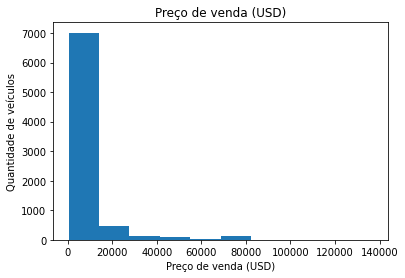

In [451]:
#Inicialmente vou checar a distribuição dos valores dessa variável sem fazer o binning.

#Importando a biblioteca matplotlib
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

plt.pyplot.hist(carros["preco_de_venda_USD"])

# Colocando os rótulos de x/y e o título da imagem

plt.pyplot.xlabel("Preço de venda (USD)")
plt.pyplot.ylabel("Quantidade de veículos")
plt.pyplot.title("Preço de venda (USD)")

In [452]:
#Construção de um array de compartimentalização

bins = np.linspace(min(carros.preco_de_venda_USD),max(carros.preco_de_venda_USD), 4)

bins

array([   410.94520548,  45936.06392694,  91461.1826484 , 136986.30136986])

In [453]:
#Criando categorias/compartimentos

group_names = ["Baixo", "Médio", "Alto"]

In [454]:
#Criando a função cortar ("cut"), o qual determina onde cada valor se localiza

carros['preco_de_venda_USD_binned'] = pd.cut(carros['preco_de_venda_USD'], bins, labels=group_names, include_lowest=True)

carros[['preco_de_venda_USD', 'preco_de_venda_USD_binned']].head(20) 

,preco_de_venda_USD,preco_de_venda_USD_binned
0,6164.383562,Baixo
1,5068.493151,Baixo
2,2164.383562,Baixo
3,3082.191781,Baixo
4,1780.821918,Baixo
5,6027.397260,Baixo
7,616.438356,Baixo
8,4794.520548,Baixo
9,2739.726027,Baixo
10,6849.315068,Baixo


In [455]:
#Identificando quantos veículos estão presentes em cada compartimento

carros["preco_de_venda_USD_binned"].value_counts()

Baixo    7641
Médio     176
Alto        2
Name: preco_de_venda_USD_binned, dtype: int64

Text(0.5, 1.0, 'Categorias de preços de venda')

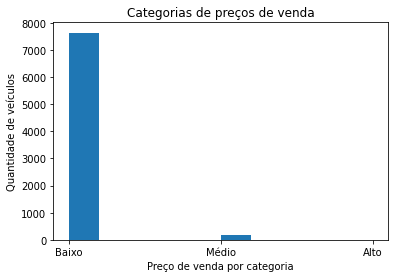

In [456]:
#Plotando a distribuição dos valores dessa variável agora com o binning

#Importando a biblioteca matplotlib

%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

plt.pyplot.hist(carros["preco_de_venda_USD_binned"])

# set x/y labels and plot title
plt.pyplot.xlabel("Preço de venda por categoria")
plt.pyplot.ylabel("Quantidade de veículos")
plt.pyplot.title("Categorias de preços de venda")

# (5) Transformação de valores categóricos para variáveis numéricas / Variável indicadora

- Uma variável indicadora, conhecida também como "dummy variable" é uma variável numérica que tem a função de rotular categorias.

- É com o uso de variáveis indicadoras que conseguimos utilizar variáveis categóricas para análises de regressão.

Para exemplificar como tornamos uma variável categórica em uma variável indicadora vou utilizar a variável "tipo_combustivel"

In [457]:
#Transformando a variável categórica para uma variável indicadora

dummy_variable_1 = pd.get_dummies(carros["tipo_combustivel"])

dummy_variable_1.head(10)

,Diesel,Petrol
0,1,0
1,1,0
2,0,1
3,1,0
4,0,1
5,0,1
7,0,1
8,1,0
9,1,0
10,1,0


In [458]:
#Mudando os nomes das colunas para ilustrar o tipo de combustível

dummy_variable_1.rename(columns={'Diesel':'tipo_de_combustivel_Diesel', 'Petrol':'tipo_de_combustivel_Petrol'}, inplace=True)

dummy_variable_1.head(10)

,tipo_de_combustivel_Diesel,tipo_de_combustivel_Petrol
0,1,0
1,1,0
2,0,1
3,1,0
4,0,1
5,0,1
7,0,1
8,1,0
9,1,0
10,1,0


In [459]:
# Unindo as colunas criadas ao dataset

carros = pd.concat([carros, dummy_variable_1], axis=1)

In [460]:
#Visualizando as duas novas tabelas. Elas estão no final do dataset

carros.head(5)

,nome_completo_do_carro,ano,preco_de_venda_USD,km_rodado,tipo_combustivel,tipo_do_vendedor,transmissao,dono,consumo_do_combustivel_kmpl,motor_CC,potencia_do_motor_bhp,assentos,preco_de_venda_USD_normalizado,consumo_do_combustivel_kmpl_normalizado,preco_de_venda_USD_binned,tipo_de_combustivel_Diesel,tipo_de_combustivel_Petrol
0,Maruti Swift Dzire VDI,2014,6164.383562,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,-0.249661,1.001961,Baixo,1,0
1,Skoda Rapid 1.5 TDI Ambition,2014,5068.493151,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,-0.347573,0.437212,Baixo,1,0
2,Honda City 2017-2020 EXi,2006,2164.383562,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,-0.607043,-0.422406,Baixo,0,1
3,Hyundai i20 Sportz Diesel,2010,3082.191781,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,-0.525040,0.902006,Baixo,1,0
4,Maruti Swift VXI BSIII,2007,1780.821918,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,-0.641312,-0.822228,Baixo,0,1


# ___________________________________________________________________

#A etapa acima finaliza esse projeto 01

### Agora vou salvar essa planilha final para poder dar prosseguimento as análises no próximo projeto.

In [461]:
from google.colab import files
carros.to_csv('carros_formatado.csv', index=False) 
files.download('carros_formatado.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Autor:


### - Lucas Andrei Campos-Silva

- link para meu portifólio de projetos em Data Science: https://github.com/Campos-Silva 
- e-mail para contato: andrei.10@hotmail.com
- linkedIn: https://www.linkedin.com/in/lucas-andrei-campos-silva/


